Лабораторна робота 2.


In [46]:
import pandas as pd 
import numpy as np

In [6]:
#Зчитати датасет ВВП (млн. дол. США) за країнами з Вікіпедії за посиланням

url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)#Table'
tables = pd.read_html(url)



In [7]:
#1.Вивести перших 5 рядків.
df = tables[2] #Таблиця, що містить дані ВВП
# Виведення перших кількох рядків таблиці
df.head()

Country/Territory IMF[1][13]            World Bank[14]             \
  Country/Territory   Forecast       Year       Estimate       Year   
0             World  109529216       2024      105435540       2023   
1     United States   28781083       2024       27360935       2023   
2             China   18532633  [n 1]2024       17794782  [n 3]2023   
3           Germany    4591100       2024        4456081       2023   
4             Japan    4110452       2024        4212945       2023   

  United Nations[15]             
            Estimate       Year  
0          100834796       2022  
1           25744100       2022  
2           17963170  [n 1]2022  
3            4076923       2022  
4            4232173       2022

In [9]:
#2.Визначити розмір датасета.
df.shape

(210, 7)

In [10]:
#3.Визначити оптимальну кількість стовпців.
df.columns 

MultiIndex([( 'Country/Territory', 'Country/Territory'),
            (        'IMF[1][13]',          'Forecast'),
            (        'IMF[1][13]',              'Year'),
            (    'World Bank[14]',          'Estimate'),
            (    'World Bank[14]',              'Year'),
            ('United Nations[15]',          'Estimate'),
            ('United Nations[15]',              'Year')],
           )

In [17]:
#4.Змінити назви стовпців на більш зручні, наприклад Country MVF_2024 WorldBank_2023 OON_2022


#1 етап
current_columns = [
    ( 'Country/Territory', 'Country/Territory'),
            (        'IMF[1][13]',          'Forecast'),
            (        'IMF[1][13]',              'Year'),
            (    'World Bank[14]',          'Estimate'),
            (    'World Bank[14]',              'Year'),
            ('United Nations[15]',          'Estimate'),
            ('United Nations[15]',              'Year')
]
new_columns = [
    'Country',
    'IMF_Forecast',
    'IMF_Year',
    'World Bank_Estimate',
    'World Bank_Year',
    'UN_Estimate',
    'UN_Year'
]

df.columns = new_columns
df.head()

,Country,IMF_Forecast,IMF_Year,World Bank_Estimate,World Bank_Year,UN_Estimate,UN_Year
0,World,109529216,2024,105435540,2023,100834796,2022
1,United States,28781083,2024,27360935,2023,25744100,2022
2,China,18532633,[n 1]2024,17794782,[n 3]2023,17963170,[n 1]2022
3,Germany,4591100,2024,4456081,2023,4076923,2022
4,Japan,4110452,2024,4212945,2023,4232173,2022


In [24]:
#4.Змінити назви стовпців на більш зручні, наприклад Country MVF_2024 WorldBank_2023 OON_2022

#РЕЗУЛЬТАТ
selected_columns = {
    'IMF_Forecast': 'MVF_2024',
    'World Bank_Estimate' : 'WorldBank_2023',
    'UN_Estimate' : 'OON_2022'
}
df1 = df[[ 'Country'] + list(selected_columns.keys())]
df = df1.rename(columns=selected_columns)
df.head()

,Country,MVF_2024,WorldBank_2023,OON_2022
0,World,109529216,105435540,100834796
1,United States,28781083,27360935,25744100
2,China,18532633,17794782,17963170
3,Germany,4591100,4456081,4076923
4,Japan,4110452,4212945,4232173


In [37]:
#5.Визначити тип даних.
df.dtypes

Country           object
MVF_2024          object
WorldBank_2023    object
OON_2022          object
dtype: object

In [57]:
#6.Замініть у таблиці значення "—" на значення NaN. Перевірити наявність пропущених значень. При наявності, замінити пропущені значення на середнє значення.
print("\nнаявність пропущених значень:\n",df.isnull().sum())

df.replace('—', np.nan, inplace=True)

df['MVF_2024'] = pd.to_numeric(df['MVF_2024'], errors='coerce')
df['WorldBank_2023'] = pd.to_numeric(df['WorldBank_2023'], errors='coerce')
df['OON_2022'] = pd.to_numeric(df['OON_2022'], errors='coerce')

df.head(10)


наявність пропущених значень:
 Country            0
MVF_2024          15
WorldBank_2023     8
OON_2022           1
dtype: int64


,Country,MVF_2024,WorldBank_2023,OON_2022
0,World,109529216.0,105435540.0,100834796.0
1,United States,28781083.0,27360935.0,25744100.0
2,China,18532633.0,17794782.0,17963170.0
3,Germany,4591100.0,4456081.0,4076923.0
4,Japan,4110452.0,4212945.0,4232173.0
5,India,3937011.0,3549919.0,3465541.0
6,United Kingdom,3495261.0,3340032.0,3089072.0
7,France,3130014.0,3030904.0,2775316.0
8,Brazil,2331391.0,2173666.0,1920095.0
9,Italy,2328028.0,2254851.0,2046952.0


In [60]:
#Прибираємо пропущені значення

df = df.replace({'—': np.nan})
df = df.fillna(df.mean(numeric_only=True), axis=0)
df.head(5)

,Country,MVF_2024,WorldBank_2023,OON_2022
0,World,109529216.0,105435540.0,100834796.0
1,United States,28781083.0,27360935.0,25744100.0
2,China,18532633.0,17794782.0,17963170.0
3,Germany,4591100.0,4456081.0,4076923.0
4,Japan,4110452.0,4212945.0,4232173.0


In [61]:
df.dtypes

Country            object
MVF_2024          float64
WorldBank_2023    float64
OON_2022          float64
dtype: object

In [62]:
#7.Ще раз перевірити наявність пропущених значень.
print("\nнаявність пропущених значень:\n",df.isnull().sum())


наявність пропущених значень:
 Country           0
MVF_2024          0
WorldBank_2023    0
OON_2022          0
dtype: int64


In [70]:
#8.Перевірити наявність дублікатів. При наявності видалити дублікати.
df.duplicated()


0      False
1      False
2      False
3      False
4      False
       ...  
205    False
206    False
207    False
208    False
209    False
Length: 210, dtype: bool

In [73]:
df_cleaned = df.drop_duplicates()

In [77]:
#9.Вивести описову статистику датасету describe()

df_stats = df.describe()
df_stats

,MVF_2024,WorldBank_2023,OON_2022
count,2.100000e+02,2.100000e+02,2.100000e+02
mean,1.123228e+06,1.037206e+06,9.612699e+05
std,7.900707e+06,7.602076e+06,7.275608e+06
min,6.600000e+01,6.200000e+01,5.900000e+01
25%,1.464775e+04,1.044175e+04,8.928250e+03
50%,6.215800e+04,4.341600e+04,3.210250e+04
75%,4.366365e+05,3.376592e+05,2.412485e+05
max,1.095292e+08,1.054355e+08,1.008348e+08


In [112]:
df = df[df['Country'] != 'World']


In [113]:
#10.Визначте відхилення (різницю) між показниками MVF_2024 та WorldBank_2023 для кожної країни. У яких країнах ці показники найбільше відрізняються (дати відповідт)?
df['Deviation'] = df['MVF_2024'] - df['WorldBank_2023']
print(df[['Country', 'Deviation']])
print('Найбільше відхилення спостерігається в United States')


              Country  Deviation
1       United States  1420148.0
2               China   737851.0
3             Germany   135019.0
4               Japan  -102493.0
5               India   387092.0
..                ...        ...
205          Kiribati       32.0
206             Palau       45.0
207  Marshall Islands       21.0
208             Nauru        7.0
209            Tuvalu        4.0

[209 rows x 2 columns]
Найбільше відхилення спостерігається в United States


In [114]:
#11.Обчисліть кореляцію між показниками MVF_2024, WorldBank_2023 та OON_2022. Які пари змінних мають найвищу кореляцію?
df11 = df[['MVF_2024','WorldBank_2023', 'OON_2022']]
print(df11.corr())
print('Найвища кореляція спостерігається в усіх стовбцях')

                MVF_2024  WorldBank_2023  OON_2022
MVF_2024        1.000000        0.993137  0.992032
WorldBank_2023  0.993137        1.000000  0.996336
OON_2022        0.992032        0.996336  1.000000
Найвища кореляція спостерігається в усіх стовбцях


In [115]:
#12.Обчисліть середнє значення для кожного стовпця (MVF_2024, WorldBank_2023, OON_2022). Як це середнє значення змінюється між роками?
df12 = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].mean()
print(df12)
print('Середні значення змінюються між роками наступним чином:середні значення показників змінюються між роками таким чином, що MVF_2024 має найбільше значення, за ним слідує WorldBank_2023, а OON_2022 має найменше середнє значення. ')


MVF_2024          604538.747884
WorldBank_2023    537692.609314
OON_2022          483406.095007
dtype: float64
Середні значення змінюються між роками наступним чином:середні значення показників змінюються між роками таким чином, що MVF_2024 має найбільше значення, за ним слідує WorldBank_2023, а OON_2022 має найменше середнє значення. 


In [116]:
#13.Обчисліть стандартне відхилення показників для кожної країни. Яка країна має найвищу варіативність у показниках між роками?
df['Std_Deviation'] = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].std(axis=1)
df[['Country', 'Std_Deviation']]
print('Найвища варіативність у показниках між роками спостерігається у United States')

Найвища варіативність у показниках між роками спостерігається у United States


In [117]:
#14.Визначення країни з найвищим та найнижчим показниками: Знайдіть країну з найвищим та найнижчим показниками у кожному з років (MVF_2024, WorldBank_2023, OON_2022).

print('Країни та їх найвищі показники')
print(df[df['MVF_2024'] == df['MVF_2024'].max()][['Country', 'MVF_2024']])
print(df[df['WorldBank_2023'] == df['MVF_2024'].max()][['Country', 'WorldBank_2023']])
print(df[df['OON_2022'] == df['MVF_2024'].max()][['Country', 'OON_2022']])

print('Країни та їх найнищими показники')
print(df[df['MVF_2024'] == df['MVF_2024'].min()][['Country', 'MVF_2024']])
print(df[df['WorldBank_2023'] == df['MVF_2024'].min()][['Country', 'WorldBank_2023']])
print(df[df['OON_2022'] == df['MVF_2024'].min()][['Country', 'OON_2022']])

Країни та їх найвищі показники
         Country    MVF_2024
1  United States  28781083.0
Empty DataFrame
Columns: [Country, WorldBank_2023]
Index: []
Empty DataFrame
Columns: [Country, OON_2022]
Index: []
Країни та їх найнищими показники
    Country  MVF_2024
209  Tuvalu      66.0
Empty DataFrame
Columns: [Country, WorldBank_2023]
Index: []
Empty DataFrame
Columns: [Country, OON_2022]
Index: []


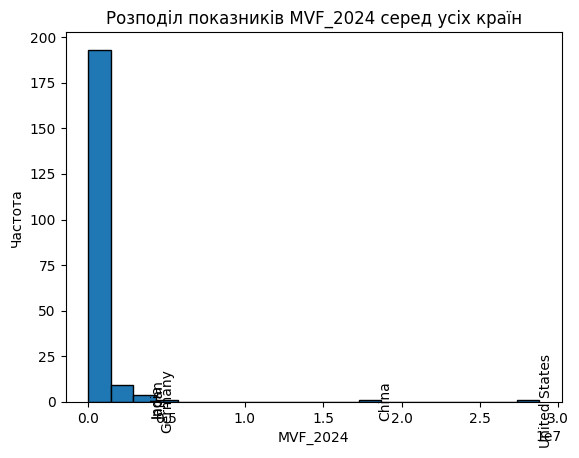

Гістограма показує розподіл значень MVF_2024. Назви країн з найвищими показниками відзначені на графіку.


In [118]:
#Побудуйте гістограму для розподілу показників MVF_2024 серед всіх країн. Який вигляд має розподіл? Чи є країни, що виділяються?

import matplotlib.pyplot as plt

# Побудова гістограми для MVF_2024
plt.hist(df['MVF_2024'], bins=20, edgecolor='black')

# Додавання підписів для країн з найвищими значеннями
top_countries = df.nlargest(5, 'MVF_2024')  # вибрати топ 5 країн за MVF_2024
for i, row in top_countries.iterrows():
    plt.text(row['MVF_2024'], 0.5, row['Country'], rotation=90, verticalalignment='center')

plt.xlabel('MVF_2024')
plt.ylabel('Частота')
plt.title('Розподіл показників MVF_2024 серед усіх країн')
plt.show()

print("Назви країн з найвищими показниками відзначені на графіку.Значну перевагу має Індія")


In [119]:
#16.Розрахуйте частку кожної країни в загальному значенні для кожного року (MVF_2024, WorldBank_2023, OON_2022). Як змінюються частки країн з часом (дати відповідь)?
# Розрахунок загальних значень
total_mvf = df['MVF_2024'].sum()
total_wb = df['WorldBank_2023'].sum()
total_oon = df['OON_2022'].sum()

# Розрахунок часток
df['MVF_2024_Share'] = df['MVF_2024'] / total_mvf
df['WorldBank_2023_Share'] = df['WorldBank_2023'] / total_wb
df['OON_2022_Share'] = df['OON_2022'] / total_oon

print(df[['Country', 'MVF_2024_Share', 'WorldBank_2023_Share', 'OON_2022_Share']])
print('United States має значну частку у кожному році, з невеликим зростанням з 2024 до 2023 та 2022 року.China показує помірний зріст частки протягом часового періоду, що може вказувати на зростання економічного впливу.Germany і Japan мають менші частки в порівнянні з попередніми країнами, з невеликими коливаннями часток протягом років.')


              Country  MVF_2024_Share  WorldBank_2023_Share  OON_2022_Share
1       United States    2.277911e-01          2.434729e-01    2.548117e-01
2               China    1.466786e-01          1.583479e-01    1.777971e-01
3             Germany    3.633677e-02          3.965270e-02    4.035284e-02
4               Japan    3.253263e-02          3.748914e-02    4.188948e-02
5               India    3.115991e-02          3.158916e-02    3.430146e-02
..                ...             ...                   ...             ...
205          Kiribati    2.461444e-06          2.482698e-06    2.207224e-06
206             Palau    2.437700e-06          2.340321e-06    2.227020e-06
207  Marshall Islands    2.413956e-06          2.527191e-06    2.761505e-06
208             Nauru    1.274252e-06          1.370378e-06    1.454986e-06
209            Tuvalu    5.223643e-07          5.517106e-07    5.839741e-07

[209 rows x 4 columns]
United States має значну частку у кожному році, з невеликим зрос

In [3]:
import matplotlib.pyplot as plt


df_melted = df.melt(id_vars='Country', value_vars=['MVF_2024', 'WorldBank_2023', 'OON_2022'], 
                    var_name='Year', value_name='Value')

plt.figure(figsize=(10, 6))
for country in df['Country']:
    country_data = df_melted[df_melted['Country'] == country]
    plt.plot(country_data['Year'], country_data['Value'], marker='o', label=country)

plt.xlabel('Рік')
plt.ylabel('Показник')
plt.title('Зміни показників для кожної країни за три роки')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


print('Тенденція на спад серед лідерів спостерігається у: United States')
print('Більш-менш стабільну рівну тенденцію спостерігаємо у: Mexico')


NameError: name 'df' is not defined